# Exploratory Data Analysis

Here we explore our dataset and find out what we can about the dataset in general. It's extremely beneficial to gain knowldge about the data you're working with in order to gain somewhat of a domain knowledge. This will help us decide which variables to pick for our machine learning model to learn. It goes without saying that variables more related to the target will yield better learning/predictive results

In [60]:
#For data Manipulation
import numpy as np
import pandas as pd
#In order to show all columns available
pd.set_option('display.max_columns', 200)

#Sklearn imports
from sklearn.preprocessing import LabelEncoder

#file system management
import os

#Graphing libs
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#listing directory, viewing files available
print(os.listdir("./Dataset"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [62]:
apptrain = pd.read_csv('./Dataset/application_train.csv')
apptest = pd.read_csv('./Dataset/application_test.csv')
print('shape of apptrain: {}, \n\nshape of apptest: {}'.format(apptrain.shape, apptest.shape))
apptrain.head()

shape of apptrain: (307511, 122), 

shape of apptest: (48744, 121)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Clean data / find missing data

We should look at the datasets to see if there are any missing values to ensure we won't run into any problems fitting the datasets to our machine learning models

In [63]:
# missing value check
# Define function
def check_missing_value(df):
    # Returns how many values are missing in each column
    missing_values = df.isnull().sum()
    # Percentage
    missing_values_percent = 100 * missing_values / len(df)
    # Table
    missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)
    # renaming columns
    missing_value_table_renamed_columns = missing_values_table.rename( columns={0: 'Missing values', 1: '% of total values'})
    # return summary info
    return missing_value_table_renamed_columns



# Create a dataframe using the previously called function to explain the missing data
expl_missing_values_df = check_missing_value(apptrain)


# Creating a new dataframe called mvdf that shows the amount of missing values and the percentage and sorts it.
mvdf = expl_missing_values_df.loc[~(expl_missing_values_df==0).all(axis=1)]
mvdf.sort_values(by=['% of total values'], ascending=False).head(30)


# Below we can see we're missing some data, this will later be resolved by imputation

,Missing values,% of total values
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


## How many of our applicants default on the loan? how many don't? Balance / Imbalance

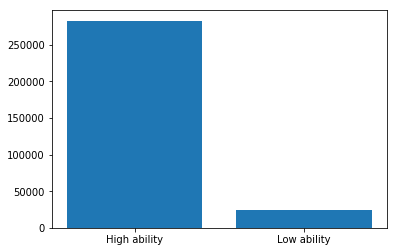

In [64]:
# count the number of 1's and 0's within the target column
apptrain['TARGET'].value_counts()


# Visual representation of 
fig, ax = plt.subplots()
x = np.arange(2)
plt.bar(x, [apptrain['TARGET'].value_counts()[0], apptrain['TARGET'].value_counts()[1]])
plt.xticks(x, ('High ability', 'Low ability'))
plt.show()

## Number of unique categories in categorical features / One-Hot encoding, Label encoding

It's useful to find out how many unique entries there are in a feature that is categorical just in case we have to do some One-Hot encoding. This let us know which columns needs one-hot encoding and which columns we can get away with label encoding via sci-kit learn package.

In [65]:
apptrain.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [66]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through columns
for col in apptrain:
    if apptrain[col].dtype == "object":
        if len(list(apptrain[col].unique())) <= 2:
            #train on the training data
            le.fit(apptrain[col])
            #transform both training and testing data
            apptrain[col] = le.transform(apptrain[col])
            apptest[col] = le.transform(apptest[col])
            
            le_count += 1
            

            
#One-Hot encoding
apptrain = pd.get_dummies(apptrain)
apptest = pd.get_dummies(apptest)



print('Training features shape: {}'.format(apptrain.shape))
print('Training features shape: {}'.format(apptest.shape))
print('{} columns were label encoded'.format(le_count))

Training features shape: (307511, 243)
Training features shape: (48744, 239)
3 columns were label encoded


### Aligning dataframes via merge
It's important to align the dataframes as the number of features the model fit is expecting from the test dataframe must be the same as the train dataframe

In [67]:
# Take the labels out of the training dataset as an inner merge will erase them since the test dataset does not have the targets
train_labels = apptrain['TARGET']


#aligning the training and testing data, keep only columns present in both df's
apptrain, apptest = apptrain.align(apptest, join = 'inner', axis = 1)
apptrain['TARGET'] = train_labels

print('Training Features shape: ', apptrain.shape)
print('Testing features shape: ', apptest.shape)
print("We're back on track, remember the training dataset will have one column more since it DOES have the targets")

Training Features shape:  (307511, 240)
Testing features shape:  (48744, 239)
We're back on track, remember the training dataset will have one column more since it DOES have the targets


### Finding Anomalies

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


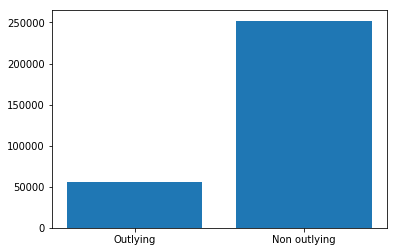

Non-anomalous dataset defaults on 8.65997453765215%
Anomalous dataset defaults on 5.399646043269405%


In [68]:
# Looking closely at our dataset, we can see we may need to do some cleaning of the 'DAYS_EMPLOYED' section
# It seems some people have erroneously been put up as having been employed for 365243 days! that's a century.
print(apptrain['DAYS_EMPLOYED'].describe())

# Let's see how many people relative to our entire dataset have had this anomaly
fig1, ax1 = plt.subplots()
x = np.arange(2)
plt.bar(x, [apptrain[apptrain['DAYS_EMPLOYED'] == 365243].count()[0], apptrain[apptrain['DAYS_EMPLOYED'] != 365243].count()[0] ])
plt.xticks(x, ['Outlying', 'Non outlying'])
plt.show()


de_anomalous = apptrain[apptrain['DAYS_EMPLOYED'] == 365243]
de_non_anomalous = apptrain[apptrain['DAYS_EMPLOYED'] != 365243]

print('Non-anomalous dataset defaults on {}%'.format(100*de_non_anomalous['TARGET'].mean()))
print('Anomalous dataset defaults on {}%'.format(100*de_anomalous['TARGET'].mean()))

# So it seems as if people relatively, people who were entered incorrectly have less of a default rate.

### Strategy for modifying working DataSet

We will replae all erroneous entries with np.nan and impute using the median strategy later on

IF YOU ARE BUILDING MODELS ON SEPARATE NOTEBOOK TAKE NOTE THAT THE DATAFRAMES MUST BE CLEANED VIA FOLLOWING CODE THAT MODIFIES DATAFRAME

There are 9274 anomalies in the test data out of 48744 entries


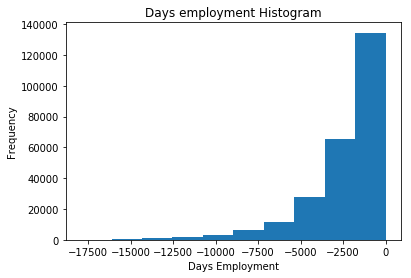

In [69]:
apptrain['DAYS_EMPLOYED_ANOM'] = apptrain['DAYS_EMPLOYED'] == 365243
apptrain['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True) # <-------- THIS CODE MODIFIES ORIGINAL DATAFRAME
apptrain['DAYS_EMPLOYED'].plot.hist(title="Days employment Histogram")
plt.xlabel('Days Employment')

# Very important to migrate changes over to our test data as well.
apptest['DAYS_EMPLOYED_ANOM'] = apptest['DAYS_EMPLOYED'] == 365243
apptest['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True) # <-------- THIS CODE MODIFIES ORIGINAL DATAFRAME
print('There are {} anomalies in the test data out of {} entries'.format(apptest['DAYS_EMPLOYED_ANOM'].sum(), len(apptest)))

# We will also change the 'DAYS_BIRTH' column two be positive
apptrain['DAYS_BIRTH'] = abs(apptrain['DAYS_BIRTH']) # <-------- THIS CODE MODIFIES ORIGINAL DATAFRAME

# Correlation

Using the corr() function will give us correlation between a feature and the target, however this is assuming that relationships are linear. even though we make this assumption it's worth noting the linear correlation in terms of feature engineering.

Top 15 positive correlations DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
TARGET                                               1.000000
Name: TARGET, dtype: float64
Top 15 negat

Text(0,0.5,'Count')

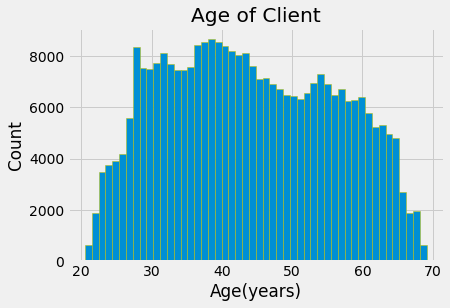

In [71]:
correlations = apptrain.corr()['TARGET'].sort_values()
print('Top 15 positive correlations', correlations.tail(15))
print('Top 15 negative correlations', correlations.head(15))



#Lets view the distribution of lients based on age
plt.style.use('fivethirtyeight')
plt.hist(apptrain['DAYS_BIRTH']/365, bins=50, edgecolor='y')
plt.title('Age of Client')
plt.xlabel('Age(years)')
plt.ylabel('Count')

Text(0.5,1,'Distribution of ages')

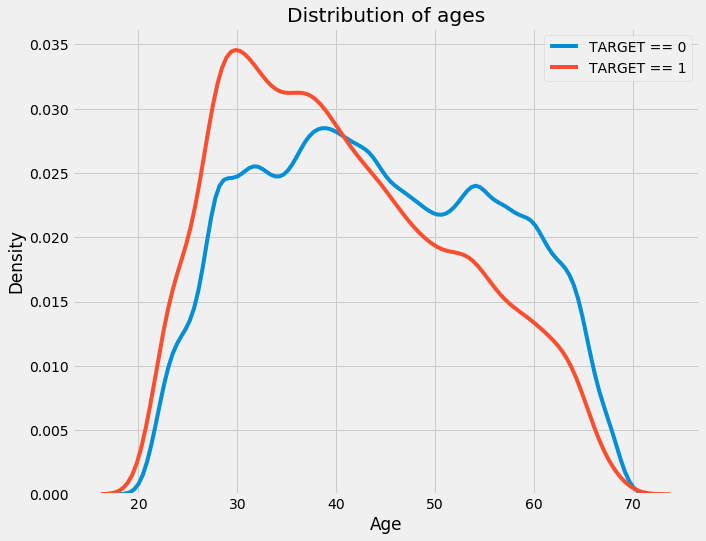

In [72]:
# We can also view the distribution based on if they were able to pay their loan back or not

plt.figure(figsize = (10, 8))
sns.kdeplot(apptrain.loc[apptrain['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'TARGET == 0')
sns.kdeplot(apptrain.loc[apptrain['TARGET'] == 1, 'DAYS_BIRTH'] / 365, LABEL = 'TARGET == 1')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of ages')

### Exploring the age variable/feature a little more deeply

Diving deeper on whether or not to pick this feature based on correlation, we can see a little bit more. For example, we can tell by the graph above that the younger audience defaults more often. It's not an extremely strong feature, and we can say that because the difference between the peak of the two line at their highest points aren't very pronounced.

In [73]:
# Make a dataframe with just the target and days_birth columns
age_df = apptrain[['TARGET', 'DAYS_BIRTH']]
# Add a column called years_birth and calculate the actual year-age of client
age_df['YEARS_BIRTH'] = age_df['DAYS_BIRTH'] / 365
# another column that puts the client in the appropriate age bin
age_df['YEARS_BINNED'] = pd.cut(age_df['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_df.head(15)

C:\Users\rGust\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rGust\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [74]:
# Change dataframe into a mean centric dataframe of all the clients
age_groups = age_df.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5,1,'Failure to repay by binned age')

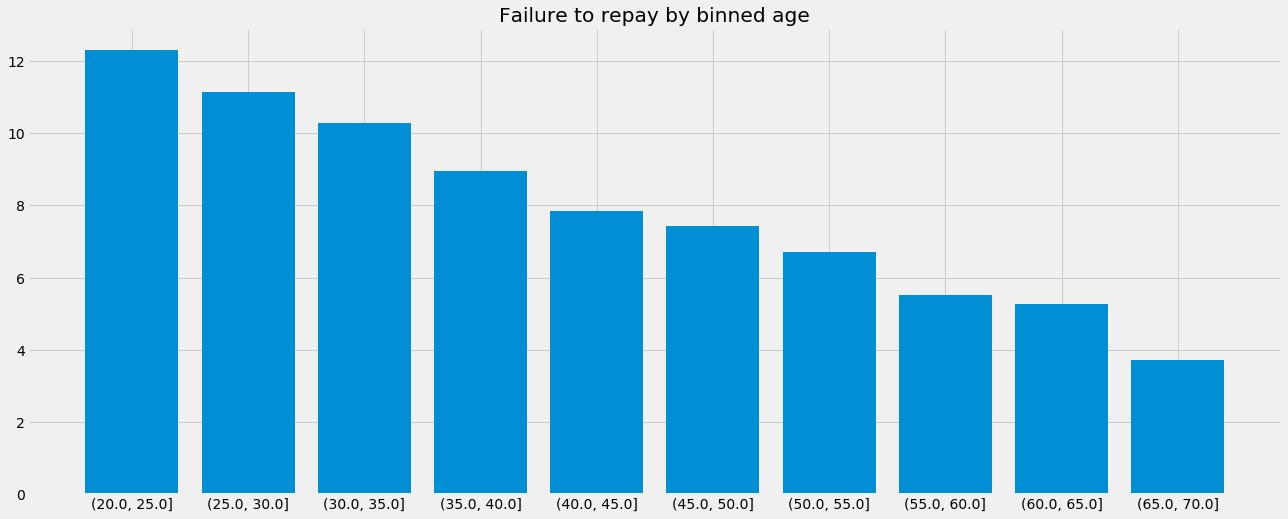

In [75]:
# Using matplotlib to graph our bins
plt.figure(figsize = ( 20, 8))
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.title('Failure to repay by binned age')

## External data Source correlation

In our dataset there are features called 'EXT_SOURCE_' those sources may have a high correlation due their score on our pandas corr() function. It's worth it to explore

                TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000


Text(0.5,1,'Correlation Heatmap')

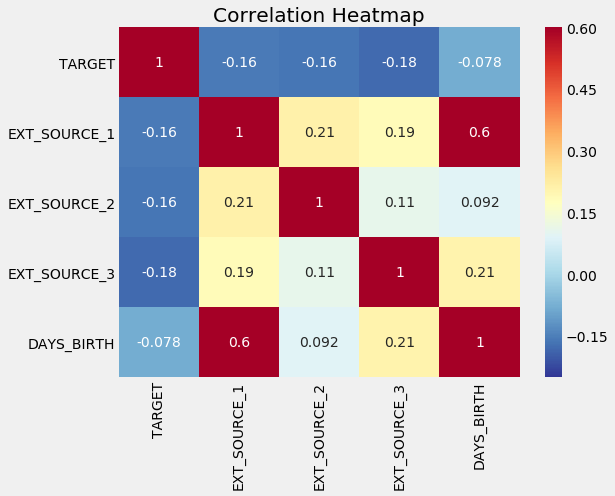

In [77]:
# Creating a dataframe with the target and external sources
external_data = apptrain[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
external_data_correlation = external_data.corr()
print(external_data_correlation)


# Deploy correlation heatmap for easier view of tabular data
plt.figure(figsize = (8, 6))
sns.heatmap(external_data_correlation, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

# Domain Knowledge

We can manipulate the variables we do know in order to create new variables that may heighten the learning experience our machine has.

In [78]:
# Creating train data copies
apptrain_domain = apptrain.copy()
apptest_domain = apptest.copy()

#Creating variables for train data
apptrain_domain['CREDIT_INCOME_PERCENT'] = apptrain_domain['AMT_CREDIT'] * 100 / apptrain_domain['AMT_INCOME_TOTAL']
apptrain_domain['ANNUITY_INCOME_PERCENT'] = apptrain_domain['AMT_ANNUITY'] / apptrain_domain['AMT_INCOME_TOTAL']
apptrain_domain['CREDIT_TERM'] = apptrain_domain['AMT_ANNUITY'] / apptrain_domain['AMT_CREDIT']
apptrain_domain['DAYS_EMPLOYED_PERCENT'] = apptrain_domain['DAYS_EMPLOYED'] / apptrain_domain['DAYS_BIRTH']

#Creating variables for test data
apptest_domain['CREDIT_INCOME_PERCENT'] = apptest_domain['AMT_CREDIT'] / apptest_domain['AMT_INCOME_TOTAL']
apptest_domain['ANNUITY_INCOME_PERCENT'] = apptest_domain['AMT_ANNUITY'] / apptest_domain['AMT_INCOME_TOTAL']
apptest_domain['CREDIT_TERM'] = apptest_domain['AMT_ANNUITY'] / apptest_domain['AMT_CREDIT']
apptest_domain['DAYS_EMPLOYED_PERCENT'] = apptest_domain['DAYS_EMPLOYED'] / apptest_domain['DAYS_BIRTH']


# Display the df
apptrain_domain[['CREDIT_INCOME_PERCENT', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'TARGET', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']].head()

,CREDIT_INCOME_PERCENT,AMT_CREDIT,AMT_INCOME_TOTAL,TARGET,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,200.788889,406597.5,202500.0,1,0.121978,0.060749,-0.067329
1,479.075000,1293502.5,270000.0,0,0.132217,0.027598,-0.070862
2,200.000000,135000.0,67500.0,0,0.100000,0.050000,-0.011814
3,231.616667,312682.5,135000.0,0,0.219900,0.094941,-0.159905
4,422.222222,513000.0,121500.0,0,0.179963,0.042623,-0.152418
